# Assignment 3: Understanding cross validation and grid search

In this notebook, you will work through a series of exercises designed to deepen your understanding of cross validation and grid search methods using SciKit-learn. The assignment requires code-based solutions—**manually computed or hard-coded results will not be accepted**. 

### Instructions:
- Write your solutions in the provided cells without altering or removing the test cells.
- Upon completion, submit the notebook in **.ipynb** format through Moodle.

In [1]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
# Do not add any cells before this one.
# This cell must remain as the first cell in your notebook for proper functionality.


<div class="alert alert-warning">

As in the previous assignment, the following cell provides two functions: one for result visualization and another for synthetic data generation. **Please DO NOT MODIFY** these functions.

You may reuse parts of this code for the final open-ended question, but ensure that both functions remain unchanged in their original forms for the guided exercises.

- The `plot_decision_surface` function creates a scatter plot showing training data points (represented by circles) and test data points (diamonds), along with the model's decision boundary.

- The `make_spirals` function generates a synthetic dataset in a spiral pattern, suitable for testing complex decision boundaries.
  
</div>

In [2]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import set_config
import pandas as pd

set_config(transform_output="pandas")


def plot_decision_surface(X_train, y_train, X_test=None, y_test=None, model=None, show_points=True, title=None):
    if X_train.shape[1] != 2:
        raise ValueError(f'Incorrect shape {X.shape}, can only plot 2D datasets')

    # just plot the dataset first
    cm = 'coolwarm'
    cm_bright = ListedColormap(['#0000FF', '#FF0000', ])

    fig, ax = plt.subplots()

    if model is not None:
        x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
        y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        X_mesh = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z = model.decision_function(X_mesh)
        except AttributeError:
            try:
                Z = model.predict_proba(X_mesh)[:, 1]
                if Z.min() >= 0:
                    Z = Z * 2 - 1
            except AttributeError:
                Z = model.predict(X_mesh)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z_max = np.abs(Z).max()
        cs_contourf = ax.contourf(xx, yy, Z, levels=10, cmap=cm, alpha=.8, vmin=-Z_max, vmax=Z_max, )
        cs_contour = ax.contour(xx, yy, Z, [-1, 0, 1], linewidths=[1, 2, 1], alpha=0.5,
                                colors=('#0000FF', 'gray', '#FF0000'))

        # Make a colorbar for the ContourSet returned by the contourf call.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = ax.figure.colorbar(cs_contourf, cax=cax)
        # Add the contour line levels to the colorbar
        try:
            cbar.add_lines(cs_contour)
        except Exception:
            pass
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

    if show_points:
        # # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   #edgecolors='k', 
                   alpha=0.25)
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
        #                edgecolors='k', alpha=0.6, s=140)
        if X_test is not None:
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       #edgecolors='k',
                       # s=100,
                       marker='D')

    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_aspect('equal', 'box')
    if title is not None:
        ax.set_title(title)
    plt.show()


def make_spirals(n_samples=100, noise=0, n_turns=2.5, random_state=42, spread=1.0):
    np.random.seed(random_state)
    n_class = int(np.ceil(n_samples / 2))
    n = np.sqrt(np.random.rand(n_class, 1)) * n_turns * (2 * np.pi)
    d1x = -np.cos(n) * n * spread
    d1y = np.sin(n) * n * spread

    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    X += noise * np.random.randn(*X.shape)
    y = np.hstack([np.zeros(n_class), np.ones(n_class)])
    X = X[:n_samples]
    y = y[:n_samples]
    return X, y

<div class="alert alert-info"><b>Exercise 1: Synthetic dataset generation</b>

Write code to generate the feature matrix `X` and the target array `y` using the `make_spirals` function defined in this notebook with the parameters: `n_samples=625`, `noise=0.3`, and `spread=0.5`. After creating the dataset, call `plot_decision_surface(X, y)` to visualize the data distribution.


<br><i>[0.25 points]</i>
</div>
<div class="alert alert-warning">

Python is case-sensitive, so ensure your code matches the required capitalization.

</div>

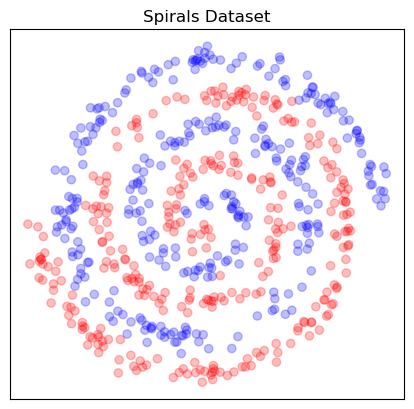

In [3]:
# YOUR CODE HERE
X, y = make_spirals(n_samples=625, noise=0.3, spread=0.5)

plot_decision_surface(X, y, title="Spirals Dataset") # Plot the data distribution

In [4]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 2: Train-test split </b>

Write code to split the generated dataset into training and testing sets using scikit learn, allocating 80% of the data for training and 20% for testing. Use `random_state=42` to ensure reproducibility. Store the resulting arrays in `X_train`, X_test, y_train, and y_test. After creating the dataset, call again plot_decision_surface(X_train, y_train, X_test, y_test) to visualize the train and test data distribution.
<br><i>[0.25 points]</i>
</div>

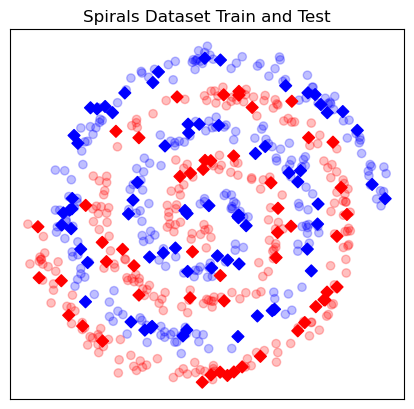

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plot_decision_surface(X_train, y_train, X_test, y_test, title= "Spirals Dataset Train and Test") # Plot the data distribution


In [6]:
# LEAVE BLANK

In [7]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3: Create cross-validation folds </b>

After splitting the complete dataset into training and test sets, the next step is to implement a 5-fold stratified cross-validation strategy to assess our model’s performance. Write code to create a list named `fold_indexes`, which will store the training sample indices used in each fold. 

Each of the five elements in `fold_indexes` should contain an array of sample indices specific to that fold. Since the synthetic dataset is balanced, ensure that each fold remains stratified by including 50% of indices from samples where `y_train == 0` and 50% from samples where `y_train == 1`.

<br><i>[1 point]</i>
</div>

<div class="alert alert-warning">

Store only the sample indices in the `fold_indexes` list, not the actual values. This way, you can later retrieve both the sample values and their corresponding target labels in the following exercises.

</div>

In [8]:
# We do this to check the class distribution
import numpy as np

# Count the number of 0's and 1's in y_train
count_0 = np.sum(y_train == 0)
count_1 = np.sum(y_train == 1)

print(f"Number of 0's in y_train: {count_0} and the percentage is {count_0/len(y_train)}")
print(f"Number of 1's in y_train: {count_1} and the percentage is {count_1/len(y_train)}")

Number of 0's in y_train: 242 and the percentage is 0.484
Number of 1's in y_train: 258 and the percentage is 0.516


After the train/test split, the synthetic dataset is not exactly balanced on 50%/50%. So we split the data into 5 folds, and in order to achieve 50%/50% proportion, some data will be discarded.

In [9]:
# YOUR CODE HERE
# We separate the indices of the different classes
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]
samples = min(len(class_0_indices), len(class_1_indices)) // 5 

fold_indexes = [] # We create a list to store the indices for each fold

for fold_idx in range(5):
  # We select equal samples for each class in this fold
  fold_class_0 = class_0_indices[fold_idx * samples : (fold_idx + 1) * samples]
  fold_class_1 = class_1_indices[fold_idx * samples : (fold_idx + 1) * samples]

  # We combine the indices
  combined_fold = np.concatenate([fold_class_0, fold_class_1])
  np.random.shuffle(combined_fold)  # we randomize the order of indices
  fold_indexes.append(combined_fold)


# We print to check the folds
for i, fold in enumerate(fold_indexes):
    print(f"Fold {i+1} indexes: {sorted(fold[:10])}... Length: {len(fold)}")


Fold 1 indexes: [3, 6, 18, 23, 53, 70, 79, 80, 85, 95]... Length: 96
Fold 2 indexes: [105, 108, 118, 126, 140, 142, 147, 160, 173, 184]... Length: 96
Fold 3 indexes: [199, 206, 215, 221, 227, 238, 242, 243, 244, 258]... Length: 96
Fold 4 indexes: [296, 311, 312, 320, 327, 340, 347, 364, 369, 384]... Length: 96
Fold 5 indexes: [389, 402, 408, 414, 416, 434, 435, 448, 453, 458]... Length: 96


In [10]:
# Method using StratifiedKFold to automatically generate the folds
"""from sklearn.model_selection import StratifiedKFold

# Assuming y_train has 500 samples
y_train = y_train[:500]

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5)

# Create a list to store the fold indexes
fold_indexes = []

# Split the dataset into folds
for train_index, test_index in skf.split(X_train, y_train):
    fold_indexes.append(test_index)

# Print the fold indexes
for i, fold in enumerate(fold_indexes):
    print(f"Fold {i+1} indexes: {fold[:5]}... Length: {len(fold)}")""" 

'from sklearn.model_selection import StratifiedKFold\n\n# Assuming y_train has 500 samples\ny_train = y_train[:500]\n\n# Initialize StratifiedKFold with 5 splits\nskf = StratifiedKFold(n_splits=5)\n\n# Create a list to store the fold indexes\nfold_indexes = []\n\n# Split the dataset into folds\nfor train_index, test_index in skf.split(X_train, y_train):\n    fold_indexes.append(test_index)\n\n# Print the fold indexes\nfor i, fold in enumerate(fold_indexes):\n    print(f"Fold {i+1} indexes: {fold[:5]}... Length: {len(fold)}")'

* Now we check the class distribution:

In [11]:
## Checking the class distribution.
import numpy as np
import pandas as pd

y_train = y_train.astype(int)

for i, fold in enumerate(fold_indexes):
    validation_indices = fold # Extract the indices for the current fold

    # Compute the proportion of each class in the validation set
    val_class_counts = np.bincount(y_train[validation_indices])
    val_class_proportions = val_class_counts / len(validation_indices)

    print(f"Fold {i+1} Validation Set Class Distribution:")
    print(f"  Class 0: {val_class_proportions[0]*100:.2f}%")
    print(f"  Class 1: {val_class_proportions[1]*100:.2f}%\n")

# Checking the entire training set as well
train_ind = np.concatenate(fold_indexes)
train_ind = train_ind.astype(int)
train_class_counts = np.bincount(y_train[train_ind])
train_class_proportions = train_class_counts / len(train_ind)

print("Entire Training Set Class Distribution:")
print(f"  Class 0: {train_class_proportions[0]*100:.2f}%")
print(f"  Class 1: {train_class_proportions[1]*100:.2f}%")


Fold 1 Validation Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Fold 2 Validation Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Fold 3 Validation Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Fold 4 Validation Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Fold 5 Validation Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Entire Training Set Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%


In [12]:
# LEAVE BLANK

In [13]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4: Create folds combinations</b>

Once the folds are created, write code to generate the index combinations for the training and validation sets at each cross-validation step. Store these combinations in a list named `folds`, which should contain five tuples. Each tuple should have two elements:

1. The indices for the training samples (i.e., the combined indices of the four folds used for training).
2. The indices for the validation samples (i.e., the indices of the fold designated for validation in that step).

<br><i>[1 point]</i>
</div>

In [14]:
# YOUR CODE HERE
folds = []

# We generate the combinations of train and validation indices
for i in range(len(fold_indexes)):
    # Indices of the validation fold
    validation_indices = fold_indexes[i]

    train_indices = np.concatenate([fold_indexes[j] for j in range(len(fold_indexes)) if j != i])

    # We ensure no duplicate indices by converting to a set and back to an array
    train_indices = np.unique(train_indices)

    # Append the tuple (train_indices, validation_indices) to the folds list
    folds.append((train_indices, validation_indices))

# We print to verify
for i, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {i+1}:")
    print(f"  Training indices: {train_idx[:10]}... Length: {len(train_idx)}")
    print(f"  Validation indices: {val_idx[:10]}... Length: {len(val_idx)}")


Fold 1:
  Training indices: [ 96  97  98  99 100 101 102 103 104 105]... Length: 384
  Validation indices: [80 70 79 23 85  3 95  6 18 53]... Length: 96
Fold 2:
  Training indices: [0 1 2 3 4 5 6 7 8 9]... Length: 384
  Validation indices: [184 126 118 147 108 160 173 142 140 105]... Length: 96
Fold 3:
  Training indices: [0 1 2 3 4 5 6 7 8 9]... Length: 384
  Validation indices: [243 199 221 258 227 238 215 244 242 206]... Length: 96
Fold 4:
  Training indices: [0 1 2 3 4 5 6 7 8 9]... Length: 384
  Validation indices: [384 311 364 347 320 312 369 296 340 327]... Length: 96
Fold 5:
  Training indices: [0 1 2 3 4 5 6 7 8 9]... Length: 384
  Validation indices: [402 408 453 434 414 389 435 448 416 458]... Length: 96


The cross-validation setup has been successfully implemented, ensuring a balanced and effective assessment of the model's performance. Each fold contains 384 samples for training and 96 samples for validation. This approach leverages the entirety of the dataset efficiently, allowing each sample to be used for both training and validation across different iterations.

In [15]:
# LEAVE BLANK

In [16]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5: Generate model candidates for the grid search </b>

Write code to create a collection of decision tree model candidates using the following hyperparameters:

- `max_depth`: [None, 3, 5, 7]
- `criterion`: ['gini', 'entropy']
- `splitter`: ['best', 'random']
- `max_features`: ['sqrt', 'log2']

Since grid search performs an exhaustive search over the parameter space, create a `DataFrame` named `param_grid` where each row represents a unique combination of these hyperparameters. Use the hyperparameter names as the column headers.

<br><i>[0.5 points]</i>
</div>


In [17]:
# YOUR CODE HERE
import pandas as pd
from itertools import product

# We define the hyperparameters
max_depth = [None, 3, 5, 7]
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

# We generate all combinations of hyperparameters, using the product function (we could instead use 4 loops)
param_combinations = list(product(max_depth, criterion, splitter, max_features))

# We turn the combinations into a dataframe 
param_grid = pd.DataFrame(param_combinations, columns=['max_depth', 'criterion', 'splitter', 'max_features'],dtype=object)

param_grid


,max_depth,criterion,splitter,max_features
0,None,gini,best,sqrt
1,None,gini,best,log2
2,None,gini,random,sqrt
3,None,gini,random,log2
4,None,entropy,best,sqrt
5,None,entropy,best,log2
6,None,entropy,random,sqrt
7,None,entropy,random,log2
8,3,gini,best,sqrt
9,3,gini,best,log2


In [18]:
# LEAVE BLANK

In [19]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 6: Fit all model candidates and store their performance metrics</b>

For each hyperparameter combination in the `param_grid` DataFrame, write code to train and validate decision tree models using the index fold combinations stored in the `folds` list. After training the models across the different folds, store the mean cross-validated training and validation metrics in a DataFrame named `metrics`.

Specifically, include the following metrics: `'train_accuracy'`, `'train_precision'`, `'train_recall'`, `'train_f1'`, `'val_accuracy'`, `'val_precision'`, `'val_recall'`, and `'val_f1'`. Also, record the corresponding hyperparameters for each model: `'max_depth'`, `'criterion'`, `'splitter'`, and `'max_features'`.

<br><i>[1 point]</i>
</div>

In [20]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# We initialize a list to store the metrics
metrics_list = []

# We iterate through each combination of hyperparameters
for _, params in param_grid.iterrows():
    # We extract hyperparameters
    max_depth = params['max_depth']
    criterion = params['criterion']
    splitter = params['splitter']
    max_features = params['max_features']
    
    # We initialize lists to store metrics for each fold
    train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
    val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], []
    
    # We iterate through the folds
    for train_idx, val_idx in folds:
        # We split the data according to the fold
        X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
        X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]
        
        # We initialize and train the model
        model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, splitter=splitter, max_features=max_features, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # We make predictions on training and validation sets
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # We compute and store the metrics for the training set
        train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
        train_precisions.append(precision_score(y_train_fold, y_train_pred))
        train_recalls.append(recall_score(y_train_fold, y_train_pred))
        train_f1s.append(f1_score(y_train_fold, y_train_pred))
        
        # We compute and store the metrics for the validation set
        val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
        val_precisions.append(precision_score(y_val_fold, y_val_pred))
        val_recalls.append(recall_score(y_val_fold, y_val_pred))
        val_f1s.append(f1_score(y_val_fold, y_val_pred))
    
    # We compute mean metrics
    mean_train_accuracy = np.mean(train_accuracies)
    mean_train_precision = np.mean(train_precisions)
    mean_train_recall = np.mean(train_recalls)
    mean_train_f1 = np.mean(train_f1s)
    mean_val_accuracy = np.mean(val_accuracies)
    mean_val_precision = np.mean(val_precisions)
    mean_val_recall = np.mean(val_recalls)
    mean_val_f1 = np.mean(val_f1s)
    
    # We store the metrics and hyperparameters in the list
    metrics_list.append({
        'max_depth': max_depth,
        'criterion': criterion,
        'splitter': splitter,
        'max_features': max_features,
        'train_accuracy': mean_train_accuracy,
        'train_precision': mean_train_precision,
        'train_recall': mean_train_recall,
        'train_f1': mean_train_f1,
        'val_accuracy': mean_val_accuracy,
        'val_precision': mean_val_precision,
        'val_recall': mean_val_recall,
        'val_f1': mean_val_f1
    })

# We create a DataFrame from the metrics list
metrics = pd.DataFrame(metrics_list,dtype=object)

# We display the metrics DataFrame
metrics



,max_depth,criterion,splitter,max_features,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
0,None,gini,best,sqrt,1.0,1.0,1.0,1.0,0.839583,0.832121,0.858333,0.843924
1,None,gini,best,log2,1.0,1.0,1.0,1.0,0.839583,0.832121,0.858333,0.843924
2,None,gini,random,sqrt,1.0,1.0,1.0,1.0,0.816667,0.816337,0.816667,0.81639
3,None,gini,random,log2,1.0,1.0,1.0,1.0,0.816667,0.816337,0.816667,0.81639
4,None,entropy,best,sqrt,1.0,1.0,1.0,1.0,0.858333,0.849222,0.879167,0.862351
5,None,entropy,best,log2,1.0,1.0,1.0,1.0,0.858333,0.849222,0.879167,0.862351
6,None,entropy,random,sqrt,1.0,1.0,1.0,1.0,0.816667,0.816337,0.816667,0.81639
7,None,entropy,random,log2,1.0,1.0,1.0,1.0,0.816667,0.816337,0.816667,0.81639
8,3,gini,best,sqrt,0.634375,0.61338,0.902083,0.705014,0.589583,0.553377,0.858333,0.656841
9,3,gini,best,log2,0.634375,0.61338,0.902083,0.705014,0.589583,0.553377,0.858333,0.656841


In [21]:
# LEAVE BLANK

In [22]:
# LEAVE BLANK

In [23]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 7: Select best model and report best attained scores</b>

Using the previously computed metrics, write code to select the best hyperparameter combination based on the accuracy metric. Then, calculate and store the model's generalization accuracy score in a variable named `generalization_score` using the appropriate dataset.

<br><i>[1 point]</i>
</div>


In [24]:
# YOUR CODE HERE
# We select the best model based on validation accuracy
best_model_params = metrics.loc[metrics['val_accuracy'].idxmax()]

print("Best hyperparameters:\n", best_model_params)

#  We train the model with the best hyperparameters on the entire training dataset
model_params = {
    'max_depth': best_model_params['max_depth'],
    'criterion': best_model_params['criterion'],
    'splitter': best_model_params['splitter'],
    'max_features': best_model_params['max_features']
}

best_dt = DecisionTreeClassifier(**model_params, random_state=42)
best_dt.fit(X_train, y_train)

# Last we calculate the generalization accuracy score on the test set
y_test_pred = best_dt.predict(X_test)
generalization_score = accuracy_score(y_test, y_test_pred)

print("Generalization Accuracy Score:", generalization_score)

Best hyperparameters:
 max_depth              None
criterion           entropy
splitter               best
max_features           sqrt
train_accuracy          1.0
train_precision         1.0
train_recall            1.0
train_f1                1.0
val_accuracy       0.858333
val_precision      0.849222
val_recall         0.879167
val_f1             0.862351
Name: 4, dtype: object
Generalization Accuracy Score: 0.888


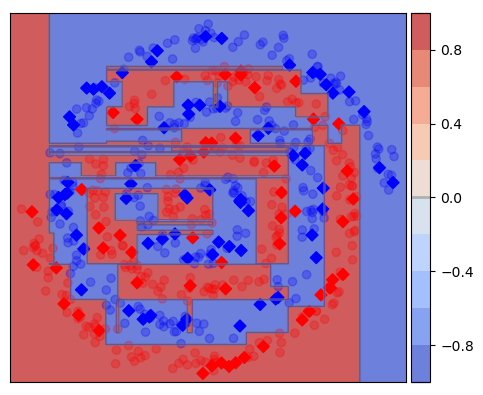

In [25]:
# DO NOT MODIFY THIS CELL. Simply execute it.
plot_decision_surface(X_train, y_train, X_test, y_test, best_dt) 

In [26]:
# LEAVE BLANK

In [27]:
# LEAVE BLANK

In [28]:
# LEAVE BLANK

In [29]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 8: Model selection with Scikit-learn GridSearchCV</b>

The previous custom grid search was limited, as it only optimized the hyperparameters of a decision tree classifier on a simple 2D synthetic dataset. Now, let’s extend this process by using Scikit-learn’s `GridSearchCV` in combination with pipelines to broaden our search across a more complex dataset and test the parameters of each step within the pipeline.

This exercise is open-ended, allowing you to explore and tune hyperparameters from any pipeline component, such as scalers, imputers, transformers, encoders, or model algorithms. Don’t restrict yourself to linear models or decision trees; instead, experiment with a variety of models, such as XGBoost or SVM classifiers. Finally, return the estimated generalization performance of the selected model.

<br><i>[5 points]</i>
</div>
<div class="alert alert-success">

<b>About the two datasets used in this exercise</b>

<u>Context</u>

Superheroes have been in popular culture for a long time, and now more than ever. Since its creation, superheroes have not been diverse, but this is changing rapidly. The two datasets aim to provide an overview of heroes and their physical and power characteristics, helping curious people to identify trends and patterns. In this case, we want to understand how physical attributes and powers define superheroes' alignment (superhero, supervillain).

<u>Content</u>
    
The columns included in both datasets are: 
- **Dataset part 1**: Name, Gender, Eye color, Race, Hair color, Height, Publisher, Skin color, Alignment, Weight,Has Superpowers, Power Level, Intelligence Level
- **Dataset part 2**: Previous columns and, Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awareness, Cold Resistance, Durability, Stealth, Energy Absorption, Flight, Danger Sense, Underwater breathing, Marksmanship, Weapons Master, Power Augmentation, Animal Attributes, Longevity, Intelligence, Super Strength, Cryokinesis, Telepathy, Energy Armor, Energy Blasts, Duplication, Size Changing, Density Control, Stamina, Astral Travel,Audio Control, Dexterity, Omnitrix, Super Speed, Possession, Animal Oriented Powers, Weapon-based Powers, Electrokinesis, Darkforce Manipulation, Death Touch, Teleportation, Enhanced Senses, Telekinesis, Energy Beams, Magic, Hyperkinesis, Jump, Clairvoyance, Dimensional Travel, Power Sense, Shapeshifting, Peak Human Condition, Immortality, Camouflage, Element Control, Phasing, Astral Projection, Electrical Transport, Fire Control,Projection, Summoning, Enhanced Memory, Reflexes, Invulnerability, Energy Constructs, Force Fields, Self-Sustenance ,Anti-Gravity, Empathy, Power Nullifier, Radiation Control, Psionic Powers, Elasticity, Substance Secretion, Elemental Transmogrification, Technopath/Cyberpath, Photographic Reflexes, Seismic Power, Animation, Precognition, Mind Control, Fire Resistance, Power Absorption, Enhanced Hearing, Nova Force, Insanity, Hypnokinesis, Animal Control, Natural Armor, Intangibility, Enhanced Sight, Molecular Manipulation, Heat Generation, Adaptation, Gliding, Power Suit, Mind Blast, Probability Manipulation, Gravity Control, Regeneration, Light Control, Echolocation, Levitation, Toxin and Disease Control, Banish, Energy Manipulation, Heat Resistance, Natural Weapons, Time Travel, Enhanced Smell, Illusions, Thirstokinesis, Hair Manipulation, Illumination, Omnipotent, Cloaking, Changing Armor, Power Cosmic, Biokinesis, Water Control, Radiation Immunity, Vision - Telescopic, Toxin and Disease Resistance, Spatial Awareness, Energy Resistance, Telepathy Resistance, Molecular Combustion, Omnilingualism, Portal Creation, Magnetism, Mind Control Resistance, Plant Control, Sonar, Sonic Scream, Time Manipulation, Enhanced Touch, Magic Resistance, Invisibility, Sub-Mariner, Radiation Absorption, Intuitive aptitude, Vision - Microscopic, Melting, Wind Control, Super Breath, Wallcrawling, Vision - Night, Vision - Infrared, Grim Reaping, Matter Absorption, The Force, Resurrection, Terrakinesis, Vision - Heat, Vitakinesis, Radar Sense, Qwardian Power Ring, Weather Control, Vision - X-Ray, Vision - Thermal, Web Creation, Reality Warping, Odin Force, Symbiote Costume, Speed Force, Phoenix Force, Molecular Dissipation, Vision - Cryo, Omnipresent, Omniscient.

Column names are self-explanatory. Physical attributes are numerical or categorical, while superpowers are dummy (Onehot) variables.

</div>

<div class="alert alert-warning">
Before starting the grid search, merge the datasets using Pandas on name and publisher.
</div>

In [30]:
# DO NOT MODIFY NOR ADD CODE TO THIS CELL
import pandas as pd

df_physical_traits = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_superpowers.csv', index_col=False)
df_superpowers = pd.read_csv(' https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_%20physical_traits.csv', index_col=False)


In [31]:
# YOUR CODE HERE
df_superpowers.shape, df_physical_traits.shape # To check the shapes of both dataframes

((734, 13), (633, 169))

We will run some codes to check and analyse the data inside the dataframe

In [32]:
# We standardize column names for merging since they have different names
df_physical_traits.rename(columns={"name": "Name", "Publisher": "Publisher"}, inplace=True)

# We merge the datasets on standardized columns
df = pd.merge(df_physical_traits, df_superpowers, on=['Name', 'Publisher'], how='inner')

print(f'The shape of the merged dataframe is: {df.shape}')

The shape of the merged dataframe is: (647, 180)


In [33]:
df.head()

,Name,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,Has Superpowers,Power Level,Intelligence Level
0,A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,...,yellow,Human,No Hair,203.0,NaN,good,441.0,False,Extremely Powerful,Super-Genius
1,Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,...,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,True,Below Average,Average Intelligence
2,Abin Sur,DC Comics,False,False,True,False,False,False,False,False,...,blue,Ungaran,No Hair,185.0,red,good,90.0,True,Average,Low Intelligence
3,Abomination,Marvel Comics,False,True,False,False,False,False,False,False,...,green,Human / Radiation,No Hair,203.0,NaN,bad,441.0,False,Extremely Powerful,Smart
4,Abraxas,Marvel Comics,False,False,False,True,False,False,False,False,...,blue,Cosmic Entity,Black,-99.0,NaN,bad,-99.0,False,Extremely Powerful,Genius


In [34]:
na_counts = df.isnull().sum()
na_percentage = round(((na_counts / len(df)) * 100),2) # Calculate the percentage of NA values per column

# Create a DataFrame to display both counts and percentages of NA values
na_summary = pd.DataFrame({
    'NA Count': na_counts,
    'NA Percentage': na_percentage
})

na_summary[na_summary['NA Count'] > 0]  # Display only the ones with NA values to see how to handle them.


,NA Count,NA Percentage
Gender,17,2.63
Eye color,124,19.17
Race,242,37.40
Hair color,125,19.32
Skin color,577,89.18
Alignment,6,0.93


After checking the data, we realize that "y" has missing values so the model would have issues. We see that there are only 6 missing values, so we can just erase them, instead of imputing values that we do not know for sure.

In [35]:
df= df.dropna(subset= ['Alignment'])
df.shape 

(641, 180)

Since we have 'Race' and 'Skin color' with so many missing values, it would make no sense to impute this columns, so we can drop them and continue with the pre-process analysis.

In [36]:
df = df.drop(columns=['Race', 'Skin color'])

In [37]:
df.nunique()[df.nunique() > 2] 

Name                  624
Publisher              24
Eye color              22
Hair color             29
Height                 51
Alignment               3
Weight                131
Power Level             5
Intelligence Level      5
dtype: int64

We run this code to evaluate correlation between the target array and the other features:

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Chi-Square test for categorical columns
categorical_results = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'Alignment':
        contingency_table = pd.crosstab(df[col], df['Alignment'])
        cramers_v_value = cramers_v(contingency_table.values)
        categorical_results[col] = cramers_v_value

# Calculate ANOVA for numerical columns
numerical_results = {}
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    groups = [group[col].dropna().values for name, group in df.groupby('Alignment')]
    f_val, p_val = f_oneway(*groups)
    numerical_results[col] = {'F-value': f_val, 'p-value': p_val}

# Display the results
categorical_results_df = pd.DataFrame(categorical_results.items(), columns=['Column', 'Cramér\'s V'])
numerical_results_df = pd.DataFrame.from_dict(numerical_results, orient='index').reset_index().rename(columns={'index': 'Column'})

print("Categorical Columns - Cramér's V")
print(categorical_results_df)
print("\nNumerical Columns - ANOVA")
print(numerical_results_df)


Categorical Columns - Cramér's V
               Column  Cramér's V
0                Name    0.999057
1           Publisher    0.191628
2              Gender    0.153596
3           Eye color    0.268015
4          Hair color    0.282169
5         Power Level    0.066039
6  Intelligence Level    0.075354

Numerical Columns - ANOVA
   Column   F-value   p-value
0  Height  0.534075  0.586473
1  Weight  4.805793  0.008481


With this two methods to analyse the correlation between each feature to the value we want to predict, we conclude:
The analysis shows that hair color and eye color exhibit moderate correlations with alignment, suggesting some trends based on these physical traits. Publisher and gender also show some correlations, though to a lesser extent. On the other hand, power level and intelligence level do not show significant correlations with alignment.

In terms of numerical data, weight shows a significant difference across alignment categories, whereas height does not. This indicates that weight may be a characteristic that varies with whether a character is good, bad, or neutral.

We will not delete Power Level, Intelligence Level nor Height just to check the overall model with them  just in case.

In [39]:
# We use this code to visually check each column with 'Alignment' and count the occurrences
intelligence_alignment_counts = df.groupby(['Power Level', 'Alignment']).size().unstack(fill_value=0)
# Display the results
print(intelligence_alignment_counts)

Alignment           bad  good  neutral
Power Level                           
Above Average        31    95        5
Average              43    89        5
Below Average        42    77        5
Extremely Powerful   39    74        6
Weak                 38    89        3


### Dealing with target array y

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Alignment'] = label_encoder.fit_transform(df['Alignment'])

print(df['Alignment'].unique()) # We need the values of the "Alignment" column as numerical in order to use the model later

[1 0 2]


In [41]:
unique, counts = np.unique(df['Alignment'], return_counts=True)

total = counts.sum()
percentages = counts / total * 100

for i in range(len(unique)):
    print(f"Class {unique[i]}: {counts[i]} samples ({percentages[i]:.2f}%)")

Class 0: 193 samples (30.11%)
Class 1: 424 samples (66.15%)
Class 2: 24 samples (3.74%)


When looking at the distribution, we realize that "neutral" class is way too underrepresented, so we need to handle this. As they are only 24 samples, we decide to manually change the ones we know to good or bad  and erase the ones we could not figure out.

In [42]:
# Filter the DataFrame to get rows where 'Alignment' is 2
neutral_class_rows = df[df['Alignment'] == 2]

# Select the 'name' and 'alignment' columns
neutral_class_subset = neutral_class_rows[['Name', 'Alignment']]
neutral_class_subset


,Name,Alignment
84,Bizarro,2
91,Black Flash,2
135,Captain Cold,2
161,Copycat,2
185,Deadpool,2
188,Deathstroke,2
215,Etrigan,2
239,Galactus,2
249,Gladiator,2
297,Indigo,2


In [43]:
# We manually define the lists of good and bad characters
good_characters = ['Deadpool', 'Etrigan', 'Gladiator', 'Living Tribunal', 'One-Above-All', 'Raven', 'Red Hulk', 'Robin VI', 'Sandman']
bad_characters = ['Bizarro', 'Black Flash', 'Captain Cold', 'Copycat', 'Galactus', 'Indigo', 'Juggernaut', 'Man-Bat', 'Sinestro', 'The Comedian', 'Toad']

# Now update the 'Alignment' column
df.loc[df['Name'].isin(good_characters), 'Alignment'] = 1
df.loc[df['Name'].isin(bad_characters), 'Alignment'] = 0

# We erase the ones we could not decide.
df = df[df['Alignment'] != 2]

unique, counts = np.unique(df['Alignment'], return_counts=True)
total = counts.sum()
percentages = counts / total * 100

for i in range(len(unique)):
    print(f"Class {unique[i]}: {counts[i]} samples ({percentages[i]:.1f}%)")


Class 0: 204 samples (32.0%)
Class 1: 433 samples (68.0%)


Now we have only two classes. Although a significant imbalance remains between "good" and "bad", it's something we can address during the modeling.

### Feature Selection

In [44]:
# We continue to create the feature matrix and the target array
X= df.drop(columns=['Name', 'Alignment']) 
y= df['Alignment']
X.head()

,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Omnipresent,Omniscient,Gender,Eye color,Hair color,Height,Weight,Has Superpowers,Power Level,Intelligence Level
0,Marvel Comics,False,True,False,False,False,True,False,False,False,...,False,False,Male,yellow,No Hair,203.0,441.0,False,Extremely Powerful,Super-Genius
1,Dark Horse Comics,True,True,False,False,True,True,False,False,False,...,False,False,Male,blue,No Hair,191.0,65.0,True,Below Average,Average Intelligence
2,DC Comics,False,False,True,False,False,False,False,False,False,...,False,False,Male,blue,No Hair,185.0,90.0,True,Average,Low Intelligence
3,Marvel Comics,False,True,False,False,False,False,False,False,False,...,False,False,Male,green,No Hair,203.0,441.0,False,Extremely Powerful,Smart
4,Marvel Comics,False,False,False,True,False,False,False,False,True,...,False,False,Male,blue,Black,-99.0,-99.0,False,Extremely Powerful,Genius


In [45]:
na_counts = X.isnull().sum()
na_percentage = round(((na_counts / len(X)) * 100),2) # Calculate the percentage of NA values per column

# Create a DataFrame to display both counts and percentages of NA values
na_summary = pd.DataFrame({
    'NA Count': na_counts,
    'NA Percentage': na_percentage
})

na_summary[na_summary['NA Count'] > 0]  # Display only the ones with NA values to see how to handle them.

,NA Count,NA Percentage
Gender,16,2.51
Eye color,122,19.15
Hair color,123,19.31


In [46]:
import numpy as np
X = X.replace(-99, np.nan) ## Observing the dataset, we can see that Height and Weight columns have -99 as values.
# We replace them with NAN values to then impute them.

### Preprocessing Pipeline

In [47]:
# Now whe import the functions we need for the pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

def create_column_transformer(X):

    # Create the dataframes that will be used in the pipeline
    X_numerical = X[['Height', 'Weight']]
    X_categorical = X[['Gender', 'Eye color','Hair color','Publisher']]
    X_ordinal = X[['Power Level', 'Intelligence Level']]
    
    # Define the numerical imputer
    numerical_imputer = SimpleImputer(strategy="mean")

    # Define the categorical pipeline
    cat_pipeline = Pipeline([
        ("most_frequent", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])
    
    # Define the ordinal pipeline
    categories = [['Weak', 'Below Average', 'Average', 'Above Average', 'Extremely Powerful'],
                  ['Low Intelligence', 'Average Intelligence', 'Smart', 'Genius', 'Super-Genius']]
    ord_pipeline = Pipeline([
        ("most_frequent", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder(categories=categories))
    ])
    
    # Combine all pipelines in a ColumnTransformer
    columntransformer_pipeline = ColumnTransformer(
        transformers=[
            ("num_imputer", numerical_imputer, X_numerical.columns),
            ("cat_pipeline", cat_pipeline, X_categorical.columns),
            ("ord_pipeline", ord_pipeline, X_ordinal.columns)
        ],
        remainder="passthrough"
    )
    
    return columntransformer_pipeline

# Now we preprocess the data to clean the dataset
X= create_column_transformer(X).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We created a column transformer to preprocess different types of data in our dataset. First, we separated the data into numerical, categorical, and ordinal categories. For the numerical data, we used a mean imputer to handle missing values. For the categorical data, we built a pipeline that imputes missing values with the most frequent value and then applies one-hot encoding. For the ordinal data, we set up a pipeline that imputes missing values with the most frequent value and applies ordinal encoding based on predefined categories. Finally, we combined these preprocessing steps into a single ColumnTransformer pipeline, ready to be applied to our dataset.

### Modeling

In [48]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pipeline with a scaler and a placeholder classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))  # Set random_state
])

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# We define the parameter grid for GridSearchCV
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],  # Set random_state
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42)],  # Set random_state
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    {
        'classifier': [SVC(probability=True, random_state=42)],  # Set random_state
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)],  # Set random_state
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0]
    }
]

# We initialize GridSearchCV with the expanded pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Extract and print the best parameters for each model
results = pd.DataFrame(grid_search.cv_results_)
best_params = results.loc[results['rank_test_score'] == 1, ['params', 'mean_test_score', 'std_test_score']]

print("\nBest Parameters for Model:")
print(best_params, "\n")

# We extract the best parameters and score
best_model_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters and Score:")
print("Best parameters:", best_model_params)
print("Best cross-validation score:", best_score)

# Finally, evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nTest Set Performance:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))



Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters for Model:
                                              params  mean_test_score  \
5  {'classifier': RandomForestClassifier(random_s...          0.70728   

   std_test_score  
5        0.019806   


Best Parameters and Score:
Best parameters: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best cross-validation score: 0.7072801397786836

Test Set Performance:
Test Accuracy: 0.7344
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.29      0.41        41
           1       0.74      0.94      0.83        87

    accuracy                           0.73       128
   macro avg       0.72      0.62      0.62       128
weighted avg       0.73      0.73      0.70       128



---
Based on the results from the grid search and test performance, we can draw a few key points:

* Best Model: The best model identified by the grid search is the RandomForestClassifier with 200 estimators and a maximum depth of 20.

* Cross-Validation Score: The mean cross-validation accuracy for the best model is approximately 0.707, with a standard deviation of about 0.02.

Test Set Performance:

* Accuracy: The test set accuracy is around 0.7344.

Precision and Recall:

* For class 0: Precision is 0.71, but recall is relatively low at 0.29, indicating that the model struggles to identify class 0 correctly.

* For class 1: Precision is 0.74 and recall is high at 0.94, showing that the model performs well in identifying class 1.

* F1-Score: The F1-scores reflect the balance between precision and recall. The score is lower for class 0 (0.41) and higher for class 1 (0.83).

Overall, the model has better performance on class 1 compared to class 0, which we could try again balancing the dataset.

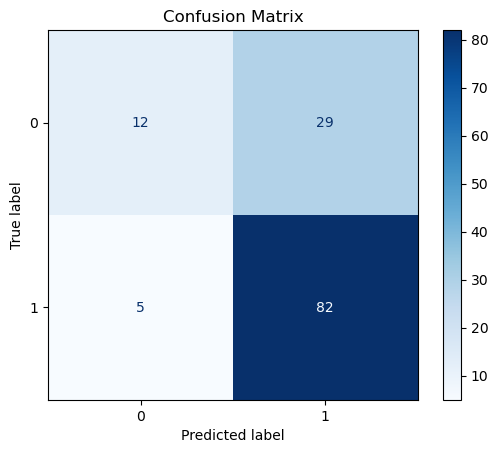

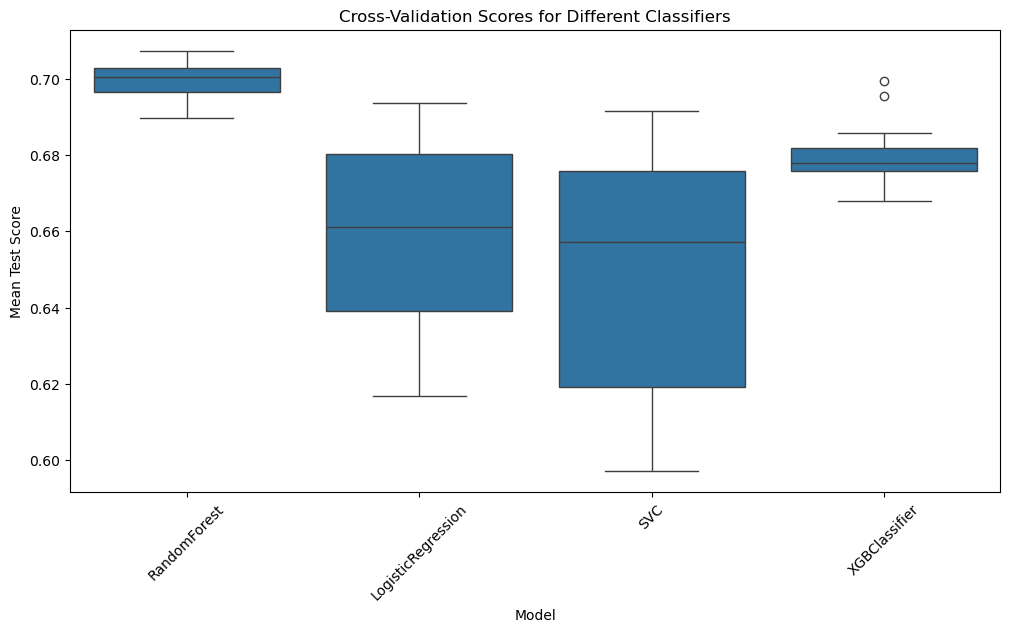

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Function to extract the model name from the parameter string
def get_model_name(param_str):
    if 'RandomForestClassifier' in param_str:
        return 'RandomForest'
    elif 'LogisticRegression' in param_str:
        return 'LogisticRegression'
    elif 'SVC' in param_str:
        return 'SVC'
    elif 'XGBClassifier' in param_str:
        return 'XGBClassifier'
    else:
        return 'Unknown'

# Apply the function to create a new column with the model names
results['model_name'] = results['param_classifier'].astype(str).apply(get_model_name)

# We plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# We plot cross-validation scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_name', y='mean_test_score', data=results)
plt.title('Cross-Validation Scores for Different Classifiers')
plt.xlabel('Model')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()


In [50]:
## Now we try the same code as before but using class_weight='balanced'
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))  # Set random_state
])

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for GridSearchCV with class_weight='balanced'
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42, class_weight='balanced')],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    {
        'classifier': [SVC(probability=True, random_state=42, class_weight='balanced')],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0]
    }
]


grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


results = pd.DataFrame(grid_search.cv_results_)
best_params = results.loc[results['rank_test_score'] == 1, ['params', 'mean_test_score', 'std_test_score']]

print("\nBest Parameters for Model:")
print(best_params, "\n")


best_model_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters and Score:")
print("Best parameters:", best_model_params)
print("Best cross-validation score:", best_score)


best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nTest Set Performance:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters for Model:
                                               params  mean_test_score  \
25  {'classifier': XGBClassifier(base_score=None, ...         0.699418   

    std_test_score  
25        0.020051   


Best Parameters and Score:
Best parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_str

---
Upon applying class weighting to balance the dataset, the XGBClassifier emerged as the best model with a mean cross-validation score of 0.699 and a test accuracy of 0.6797. Compared to the previous results using the RandomForestClassifier with a test accuracy of 0.7344 and a mean cross-validation score of 0.707, the class-weighted approach slightly underperforms. The precision and recall for class 0 in the new result remain challenging, similar to the previous result.

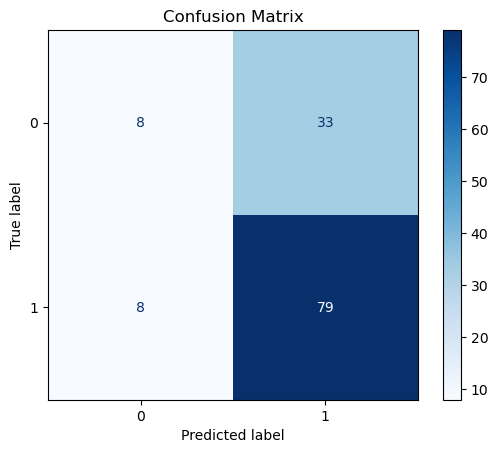

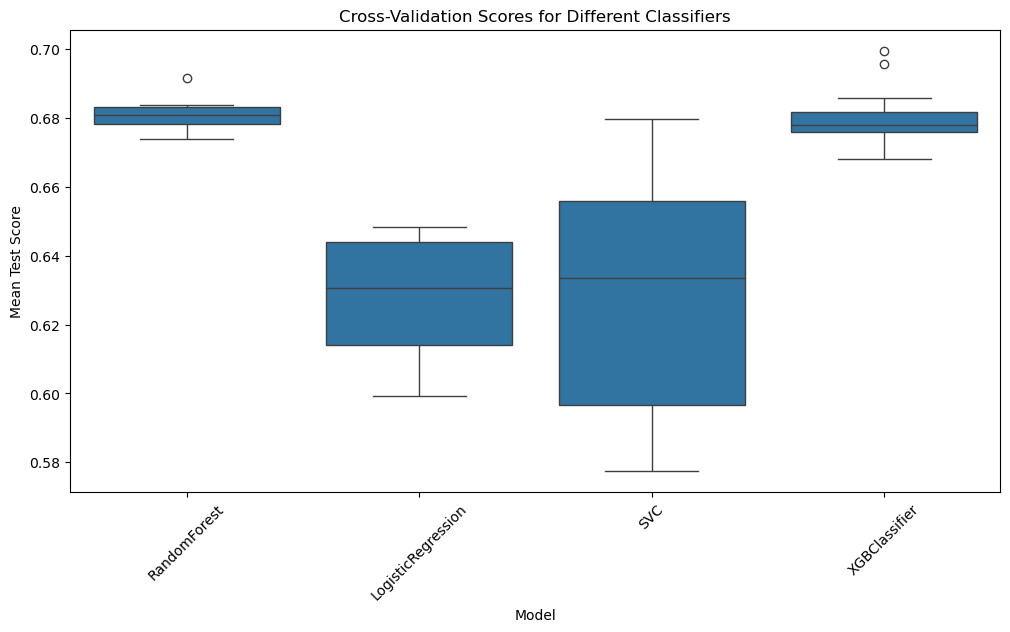

In [51]:
# We plot again
results['model_name'] = results['param_classifier'].astype(str).apply(get_model_name)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='model_name', y='mean_test_score', data=results)
plt.title('Cross-Validation Scores for Different Classifiers')
plt.xlabel('Model')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

Conclusion: this exercise has demonstrated the importance of both data preprocessing and careful model evaluation but also highlights that no amount of modeling sophistication can fully compensate for inherent limitations in the data. After balancing the classes, we noticed a slight drop in accuracy and precision for the XGBClassifier compared to the initial RandomForestClassifier, yet the results remain consistent in highlighting challenges with class 0. This indicates that while balancing techniques like class weighting improve fairness, the inherent data limitations persist. The next logical step would involve acquiring higher-quality, more balanced, and potentially domain-specific features to truly enhance model performance.